<a href="https://colab.research.google.com/github/Nacho2904/pasantiacsc/blob/main/agosto30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) Encontrar la solución óptima invirtiendo la matriz, calcular el ECM y graficar la regresión elegida sobre un scatter plot / hecho

2) Predecir ganancias para 35.000 habitantes

3opt) Graficar el problema de optimización en 3-D (bias - weight y Risk) para todos los theta posibles

4) Resolver el problema con GD (repetir 1 y 2)

5) Plotear riesgo vs epochs

6) Chequear el LR óptimo

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
GANANCIAS = 1
POBLACION = 0

# A la vieja usanza

In [3]:
from urllib import request
example1_url="https://raw.githubusercontent.com/CSC-CONICET/CURSO-LEARNING1/main/datasets/mc.txt"
f = request.urlopen(example1_url)
dataset = np.matrix(np.loadtxt(f, dtype=float, delimiter=","))
#separamos el dataset usando 80/20

In [4]:
  # separamos las ganancias del dataset
  Y = dataset[:,GANANCIAS]
  Y

matrix([[17.592  ],
        [ 9.1302 ],
        [13.662  ],
        [11.854  ],
        [ 6.8233 ],
        [11.886  ],
        [ 4.3483 ],
        [12.     ],
        [ 6.5987 ],
        [ 3.8166 ],
        [ 3.2522 ],
        [15.505  ],
        [ 3.1551 ],
        [ 7.2258 ],
        [ 0.71618],
        [ 3.5129 ],
        [ 5.3048 ],
        [ 0.56077],
        [ 3.6518 ],
        [ 5.3893 ],
        [ 3.1386 ],
        [21.767  ],
        [ 4.263  ],
        [ 5.1875 ],
        [ 3.0825 ],
        [22.638  ],
        [13.501  ],
        [ 7.0467 ],
        [14.692  ],
        [24.147  ],
        [-1.22   ],
        [ 5.9966 ],
        [12.134  ],
        [ 1.8495 ],
        [ 6.5426 ],
        [ 4.5623 ],
        [ 4.1164 ],
        [ 3.3928 ],
        [10.117  ],
        [ 5.4974 ],
        [ 0.55657],
        [ 3.9115 ],
        [ 5.3854 ],
        [ 2.4406 ],
        [ 6.7318 ],
        [ 1.0463 ],
        [ 5.1337 ],
        [ 1.844  ],
        [ 8.0043 ],
        [ 1.0179 ],


In [5]:
#Separamos la matrix X de inputs del dataset y le anadimos la columna de unos
population = dataset[:,0]
X = np.append(np.ones(len(dataset)).reshape(len(dataset),1), dataset[:,POBLACION], axis=1)
X

matrix([[ 1.    ,  6.1101],
        [ 1.    ,  5.5277],
        [ 1.    ,  8.5186],
        [ 1.    ,  7.0032],
        [ 1.    ,  5.8598],
        [ 1.    ,  8.3829],
        [ 1.    ,  7.4764],
        [ 1.    ,  8.5781],
        [ 1.    ,  6.4862],
        [ 1.    ,  5.0546],
        [ 1.    ,  5.7107],
        [ 1.    , 14.164 ],
        [ 1.    ,  5.734 ],
        [ 1.    ,  8.4084],
        [ 1.    ,  5.6407],
        [ 1.    ,  5.3794],
        [ 1.    ,  6.3654],
        [ 1.    ,  5.1301],
        [ 1.    ,  6.4296],
        [ 1.    ,  7.0708],
        [ 1.    ,  6.1891],
        [ 1.    , 20.27  ],
        [ 1.    ,  5.4901],
        [ 1.    ,  6.3261],
        [ 1.    ,  5.5649],
        [ 1.    , 18.945 ],
        [ 1.    , 12.828 ],
        [ 1.    , 10.957 ],
        [ 1.    , 13.176 ],
        [ 1.    , 22.203 ],
        [ 1.    ,  5.2524],
        [ 1.    ,  6.5894],
        [ 1.    ,  9.2482],
        [ 1.    ,  5.8918],
        [ 1.    ,  8.2111],
        [ 1.    ,  7

Calculamos la seudoinversa mediante la formula derivada

In [6]:
XtX = np.matmul(np.transpose(X), X)
seudoinversa = np.matmul(np.linalg.inv(XtX), np.transpose(X))

Finalmente, calculamos los pesos 

In [7]:
w = np.matmul(seudoinversa, Y)
w

matrix([[-3.89578088],
        [ 1.19303364]])

In [8]:
phi = lambda x: float(w[0,0] + w[1,0]*x)

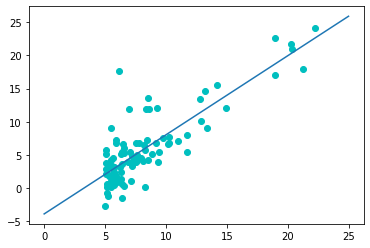

In [9]:
xaxis = np.arange(0, 25, 0.01)
yaxis = np.array([phi(x) for x in xaxis])
plt.plot(xaxis, yaxis)
plt.scatter(np.array(dataset[:,POBLACION]),np.array(dataset[:,GANANCIAS]), c='c')

### Calculamos el error cuadratico medio

In [10]:
ecm = float((1/len(dataset))*sum([(Y[i] - phi(dataset[i,0]))**2 for i in range(0,len(dataset))]))
ecm

8.953942751950358

## Prediccion para 35k habitantes

In [11]:
phi(35000)

41752.28176575754

3: Grafico del riesgo empirico para cada $(x,y) \in \mathbb{R}^2$

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


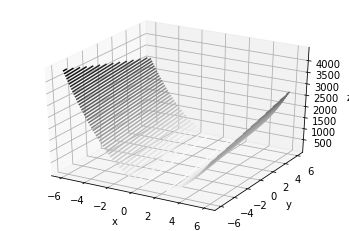

In [12]:

def f(x, y):
    return (1/len(dataset))*sum([(dataset[i,1] - (y + x*dataset[i,0]))**2 for i in range(0,len(dataset))])

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');



#Usando tf

In [13]:
X = dataset[:,POBLACION]
Y = dataset[:,GANANCIAS]

In [38]:
model_1 = tf.keras.Sequential()
model_1.add(tf.keras.layers.Dense(1, input_dim=1))
model_1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Con learning rate arbitrario

In [39]:
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)
model_1.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.008),loss='MeanSquaredError')
hist = model_1.fit(x=X, y=Y, batch_size = 97, epochs=100000,callbacks=[es])

Epoch 1/100000
1/1 [==============================] - 0s 122ms/step - loss: 298.0675
Epoch 2/100000
1/1 [==============================] - 0s 4ms/step - loss: 40.4614
Epoch 3/100000
1/1 [==============================] - 0s 4ms/step - loss: 14.7907
Epoch 4/100000
1/1 [==============================] - 0s 3ms/step - loss: 12.2187
Epoch 5/100000
1/1 [==============================] - 0s 3ms/step - loss: 11.9470
Epoch 6/100000
1/1 [==============================] - 0s 3ms/step - loss: 11.9046
Epoch 7/100000
1/1 [==============================] - 0s 3ms/step - loss: 11.8851
Epoch 8/100000
1/1 [==============================] - 0s 3ms/step - loss: 11.8680
Epoch 9/100000
1/1 [==============================] - 0s 4ms/step - loss: 11.8512
Epoch 10/100000
1/1 [==============================] - 0s 3ms/step - loss: 11.8345
Epoch 11/100000
1/1 [==============================] - 0s 3ms/step - loss: 11.8179
Epoch 12/100000
1/1 [==============================] - 0s 3ms/step - loss: 11.8014
Epoch 13/1

Nuestro learning rate escogido arriba fue demasiado pequeño, de ahí que necesitó casi 1300 epochs para completar el entrenamiento

In [16]:
param = model.get_weights()
param

[array([[1.1892565]], dtype=float32), array([-3.8581839], dtype=float32)]

Notamos que dio algo extremadamente similar al resultado analíticamente obtenido mediante cálculo de la seudoinversa

Con learning rate optimo

In [33]:
eigenvalues,eigenvectors = np.linalg.eig(XtX)
lambda_max = max(eigenvalues)
lambda_min = min(eigenvalues)
alpha_optimo = (len(dataset)/(lambda_max + lambda_min))
alpha_optimo

0.01213534165664063

In [34]:
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(1, input_dim=1))
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)
model2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=alpha_optimo),loss='MeanSquaredError')
hist = model2.fit(x=X, y=Y, batch_size = 97, epochs=100000,callbacks=[es])

Epoch 1/100000
1/1 [==============================] - 0s 126ms/step - loss: 25.9394
Epoch 2/100000
1/1 [==============================] - 0s 5ms/step - loss: 25.7911
Epoch 3/100000
1/1 [==============================] - 0s 4ms/step - loss: 25.6441
Epoch 4/100000
1/1 [==============================] - 0s 4ms/step - loss: 25.4984
Epoch 5/100000
1/1 [==============================] - 0s 4ms/step - loss: 25.3539
Epoch 6/100000
1/1 [==============================] - 0s 4ms/step - loss: 25.2108
Epoch 7/100000
1/1 [==============================] - 0s 4ms/step - loss: 25.0688
Epoch 8/100000
1/1 [==============================] - 0s 3ms/step - loss: 24.9281
Epoch 9/100000
1/1 [==============================] - 0s 3ms/step - loss: 24.7887
Epoch 10/100000
1/1 [==============================] - 0s 3ms/step - loss: 24.6504
Epoch 11/100000
1/1 [==============================] - 0s 3ms/step - loss: 24.5133
Epoch 12/100000
1/1 [==============================] - 0s 3ms/step - loss: 24.3775
Epoch 13/10

Con learning rate óptimo terminamos el entrenamiento en 1300 epochs

Normalizando las entradas

In [35]:
mu_k = (1/len(dataset))*sum(X)
sigma_k = math.sqrt((1/len(dataset))* sum([(X[i] - mu_k)**2 for i in range(0,len(dataset))]))
mu_k, sigma_k

(matrix([[8.1598]]), 3.8498839959227156)

In [36]:
X_normalized = np.array([(x-mu_k)/sigma_k for x in X]).reshape(len(X), 1)
XtX_normalized = np.matmul(np.transpose(X), X)
eigenvalues_normalized,eigenvectors_normalized = np.linalg.eig(XtX_normalized)
lambda_max_normalized = max(eigenvalues_normalized)
lambda_min_normalized = min(eigenvalues_normalized)
alpha_optimo_normalized = (len(dataset)/(lambda_max_normalized + lambda_min_normalized))
alpha_optimo_normalized

0.006142208628554187

In [37]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim=1))
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=alpha_optimo_normalized),loss='MeanSquaredError')
hist = model.fit(x=X_normalized, y=Y, batch_size = 97, epochs=100000,callbacks=[es])

Epoch 1/100000
1/1 [==============================] - 0s 126ms/step - loss: 57.6980
Epoch 2/100000
1/1 [==============================] - 0s 7ms/step - loss: 56.5077
Epoch 3/100000
1/1 [==============================] - 0s 5ms/step - loss: 55.3466
Epoch 4/100000
1/1 [==============================] - 0s 5ms/step - loss: 54.2138
Epoch 5/100000
1/1 [==============================] - 0s 11ms/step - loss: 53.1086
Epoch 6/100000
1/1 [==============================] - 0s 5ms/step - loss: 52.0305
Epoch 7/100000
1/1 [==============================] - 0s 6ms/step - loss: 50.9786
Epoch 8/100000
1/1 [==============================] - 0s 5ms/step - loss: 49.9525
Epoch 9/100000
1/1 [==============================] - 0s 7ms/step - loss: 48.9514
Epoch 10/100000
1/1 [==============================] - 0s 6ms/step - loss: 47.9747
Epoch 11/100000
1/1 [==============================] - 0s 10ms/step - loss: 47.0219
Epoch 12/100000
1/1 [==============================] - 0s 8ms/step - loss: 46.0924
Epoch 13/

Con normalización y learning rate óptimo terminamos el entrenamiento en 543 epochs